In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc, roc_auc_score
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout
from keras.callbacks import ReduceLROnPlateau

In [5]:
train_data_dir = '/content/drive/MyDrive/Colab Notebooks/Images/train'
test_data_dir = '/content/drive/MyDrive/Colab Notebooks/Images/test'

In [6]:
batch_size = 32
img_height = 64
img_width = 64

In [7]:
# Create data generators
train_datagen = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory('/content/drive/MyDrive/Colab Notebooks/Images/train', target_size=(img_height, img_width),
                                                    batch_size=batch_size, class_mode='binary')

test_generator = test_datagen.flow_from_directory('/content/drive/MyDrive/Colab Notebooks/Images/test', target_size=(img_height, img_width),
                                                  batch_size=batch_size, class_mode='binary')

Found 39 images belonging to 2 classes.
Found 29 images belonging to 2 classes.


In [8]:
train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/drive/MyDrive/Colab Notebooks/Images/train',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/drive/MyDrive/Colab Notebooks/Images/test',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)

Found 39 files belonging to 2 classes.
Found 29 files belonging to 2 classes.


In [9]:
def process(image,label):
    image = tf.cast(image/255. ,tf.float32)
    return image,label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [10]:
lr_scheduler = ReduceLROnPlateau(monitor="val_loss",
                                factor=0.5,
                                patience=3,
                                min_lr=1e-7) #(0.0000001)

In [11]:
train_datagen = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory('/content/drive/MyDrive/Colab Notebooks/Images/train', target_size=(img_height, img_width),
                                                    batch_size=batch_size, class_mode='binary')
test_generator = test_datagen.flow_from_directory('/content/drive/MyDrive/Colab Notebooks/Images/test', target_size=(img_height, img_width),
                                                  batch_size=batch_size, class_mode='binary')

Found 39 images belonging to 2 classes.
Found 29 images belonging to 2 classes.


In [12]:
model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 batch_normalization (Batch  (None, 254, 254, 32)      128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_1 (Bat  (None, 125, 125, 64)      256       
 chNormalization)                                                
                                                        

In [14]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [15]:
history = model.fit(train_ds,epochs=10,validation_data=validation_ds)

Epoch 1/10
2/2 [==============================] - 21s 8s/step - loss: 14.3423 - accuracy: 0.4615 - val_loss: 0.6115 - val_accuracy: 0.7241
Epoch 2/10
2/2 [==============================] - 5s 2s/step - loss: 7.4406 - accuracy: 0.8462 - val_loss: 2.5864 - val_accuracy: 0.2759
Epoch 3/10
2/2 [==============================] - 5s 2s/step - loss: 10.0952 - accuracy: 0.6410 - val_loss: 4.6072 - val_accuracy: 0.2759
Epoch 4/10
2/2 [==============================] - 5s 2s/step - loss: 3.2221 - accuracy: 0.8462 - val_loss: 5.9049 - val_accuracy: 0.2759
Epoch 5/10
2/2 [==============================] - 6s 2s/step - loss: 2.3022 - accuracy: 0.8718 - val_loss: 7.1869 - val_accuracy: 0.2759
Epoch 6/10
2/2 [==============================] - 7s 3s/step - loss: 3.2806 - accuracy: 0.8718 - val_loss: 8.6687 - val_accuracy: 0.2759
Epoch 7/10
2/2 [==============================] - 5s 2s/step - loss: 2.7314 - accuracy: 0.8718 - val_loss: 10.9064 - val_accuracy: 0.2759
Epoch 8/10
2/2 [=====================

In [16]:
# Evaluate the model
test_loss, test_acc = model.evaluate(validation_ds)
print("Test Accuracy:", test_acc)

1/1 [==============================] - 1s 895ms/step - loss: 17.1982 - accuracy: 0.2759
Test Accuracy: 0.27586206793785095


In [17]:
#upload any image add link after image.jpg
!wget -O image1.jpg https://rukminim2.flixcart.com/image/416/416/kdj4xow0/showpiece-figurine/v/x/f/laxmi-ganesh-saraswati-with-diya-chhariya-crafts-original-imafuf79ctqvu6bz.jpeg?q=70

--2024-01-11 04:19:33--  https://rukminim2.flixcart.com/image/416/416/kdj4xow0/showpiece-figurine/v/x/f/laxmi-ganesh-saraswati-with-diya-chhariya-crafts-original-imafuf79ctqvu6bz.jpeg?q=70
Resolving rukminim2.flixcart.com (rukminim2.flixcart.com)... 23.36.117.157
Connecting to rukminim2.flixcart.com (rukminim2.flixcart.com)|23.36.117.157|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 34722 (34K) [image/jpeg]
Saving to: ‘image1.jpg’

image1.jpg          100%[===================>]  33.91K  --.-KB/s    in 0.01s   

2024-01-11 04:19:33 (3.15 MB/s) - ‘image1.jpg’ saved [34722/34722]



In [18]:
#reading the image we uploaded from link through cv2
import cv2
image1 = cv2.imread("image1.jpg")

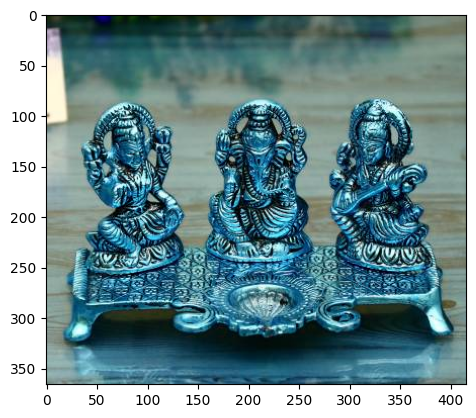

In [19]:
plt.imshow(image1)

In [20]:
#resizing the image
image1 = cv2.resize(image1, (256,256))

In [21]:
# providing the shape of the image
test_image1 = image1.reshape((1,256,256,3))

In [22]:
model.predict(test_image1)

1/1 [==============================] - 0s 129ms/step


array([[1.]], dtype=float32)

In [23]:
#prediction
def prediction(image):
    if model.predict(image) == [[0]]:
        print("Image A")
    else:
        print("Image B")
prediction(test_image1)

1/1 [==============================] - 0s 38ms/step
Image B
